### Email Similarity Naive Bayes Classifier

Use scikit-learn’s Naive Bayes implementation on several different datasets.

- How difficult is to distinguish the difference between emails about baseball and emails about hockey?


- By reporting the accuracy of the classifier, find which datasets are harder to distinguish.


#### Import Modules

In [62]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [32]:
emails = fetch_20newsgroups()

In [33]:
# emails = fetch_20newsgroups()
# emails.target_names >>>
# ['alt.atheism',
# 'comp.graphics',
# 'comp.os.ms-windows.misc',
# 'comp.sys.ibm.pc.hardware',
# 'comp.sys.mac.hardware',
# 'comp.windows.x',
# 'misc.forsale',
# 'rec.autos',
# 'rec.motorcycles',
# 'rec.sport.baseball',
# 'rec.sport.hockey',
# 'sci.crypt',
# 'sci.electronics',
# 'sci.med',
# 'sci.space',
# 'soc.religion.christian',
# 'talk.politics.guns',
# 'talk.politics.mideast',
# 'talk.politics.misc',
# 'talk.religion.misc'] 

In [25]:
def email_similarity_nbclassifier(input_categories):
    # Making training and Test sets
    train_emails = fetch_20newsgroups(categories = input_categories, shuffle = True, random_state =108, subset = 'train')
    test_emails = fetch_20newsgroups(categories =  input_categories, shuffle = True, random_state =108, subset='test')
    # Use CountVectorizer to transform emails into lists of word counts
    counter = CountVectorizer()
    counter.fit(test_emails.data + train_emails.data)
    train_counts = counter.transform(train_emails.data)
    test_counts = counter.transform(test_emails.data)
    # Making a NaiveBayes classifier
    classifier = MultinomialNB()
    classifier.fit(train_counts, train_emails.target)
    print("NB classifier accuracy: {:.3f} for following email categories {}"\
          .format(classifier.score(test_counts, test_emails.target), input_categories))

In [77]:
email_similarity_nbclassifier(['rec.sport.baseball', 'rec.sport.hockey'])

NB classifier accuracy: 0.997 for following email categories ['comp.sys.ibm.pc.hardware', 'rec.sport.hockey']


In [35]:
def email_similarity_nbclassifier_graph(input_categories):
    # Making training and Test sets
    train_emails = fetch_20newsgroups(categories = input_categories, shuffle = True, random_state =108, subset = 'train')
    test_emails = fetch_20newsgroups(categories =  input_categories, shuffle = True, random_state =108, subset='test')
    # Use CountVectorizer to transform emails into lists of word counts
    counter = CountVectorizer()
    counter.fit(test_emails.data + train_emails.data)
    train_counts = counter.transform(train_emails.data)
    test_counts = counter.transform(test_emails.data)
    # Making a NaiveBayes classifier
    classifier = MultinomialNB()
    classifier.fit(train_counts, train_emails.target)
    return classifier.score(test_counts, test_emails.target)

In [36]:
def find_pairs(source_list):
        pair_list = []
        for i in range(len(source_list)):
                for j in range(i+1,len(source_list)):
                        pair_list.append([source_list[i],source_list[j]])
        return pair_list

In [40]:
target_name_pairs = find_pairs(emails.target_names)

In [46]:
classifier_accuracies = []
for i in target_name_pairs:
    accuracy = email_similarity_nbclassifier_graph(i)
    classifier_accuracies.append(accuracy)
print (classifier_accuracies)    

[0.9788135593220338, 0.6886395511921458, 0.9915611814345991, 0.9914772727272727, 0.9943977591036415, 0.9887165021156559, 0.9916083916083916, 0.9902370990237099, 0.9874301675977654, 0.9874651810584958, 0.9874125874125874, 0.9901685393258427, 0.9734265734265735, 0.9775596072931276, 0.9651324965132496, 0.9853587115666179, 0.9482014388489208, 0.9570747217806042, 0.8491228070175438, 0.5006385696040868, 0.939820742637644, 0.9431524547803618, 0.860969387755102, 0.975609756097561, 0.9796178343949045, 0.9860228716645489, 0.9847328244274809, 0.9961928934010152, 0.9643312101910828, 0.9232736572890026, 0.9668789808917198, 0.9719029374201787, 0.9796696315120712, 0.9827357237715804, 0.9816993464052287, 0.9814020028612304, 0.975, 0.5, 0.4980744544287548, 0.5044359949302915, 0.5790816326530612, 0.589873417721519, 0.6136363636363636, 0.7155499367888748, 0.7919293820933165, 0.5822784810126582, 0.5349428208386277, 0.5962025316455696, 0.6104060913705583, 0.7361111111111112, 0.6503957783641161, 0.748051948

In [65]:
classifier_index = list(range(0,len(target_name_pairs)))

In [75]:
easiest_to_distinguish = max(classifier_accuracies)   
hardest_to_distinguish = min(classifier_accuracies)   

easiest_to_distinguish_index = classifier_accuracies.index(max(classifier_accuracies))   
hardest_to_distinguish_index = classifier_accuracies.index(min(classifier_accuracies))  

print("Easiest email categories to distinguish are {} with NB Classifier Accuracy: {:.3f} "\
      .format(target_name_pairs[easiest_to_distinguish_index],easiest_to_distinguish))

print("\nHardest email categories to distinguish are {} with NB Classifier Accuracy: {:.3f} "\
      .format(target_name_pairs[hardest_to_distinguish_index],hardest_to_distinguish))

Easiest email categories to distinguish are ['comp.sys.ibm.pc.hardware', 'rec.sport.hockey'] with NB Classifier Accuracy: 0.997 

Hardest email categories to distinguish are ['comp.os.ms-windows.misc', 'comp.sys.mac.hardware'] with NB Classifier Accuracy: 0.498 


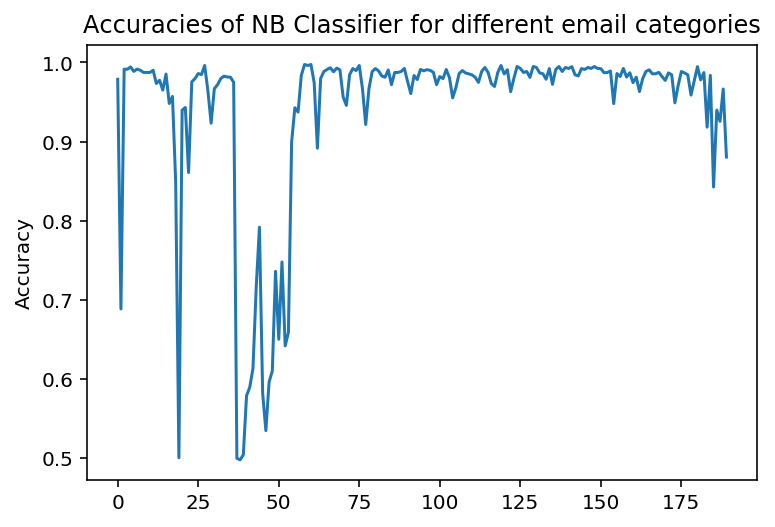

In [66]:
plt.plot(classifier_index, classifier_accuracies)
plt.title('Accuracies of NB Classifier for different email categories')
plt.ylabel('Accuracy')
plt.show()